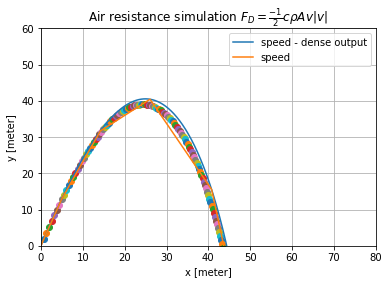

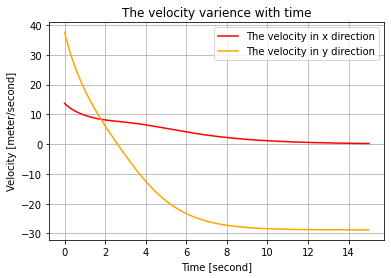

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

## simple model parameter for air density and surface area
r = 0.05
c = 0.47
rho_air = 1.28
A = np.pi * r**2

## parameter for resistance, mass and gravity 
k = 0.5 * c * rho_air * A
m = 0.2
g = 9.81

## Key in the ball throwing problem with air resistance
## Consider two direction, x and y[hight]
def Air_resistance(t, para):
    x, vx, y, vy = para
    v = (vx**2+ vy**2)**(1/2)
    ax = -k/m * v * vx
    ay = -k/m * v * vy - g
    return vx, ax, vy, ay


## Initial conditions
v0 = 40
phi0 = np.radians(70)
para = 0, v0 * np.cos(phi0), 0., v0 * np.sin(phi0)
t0, tf = 0, 15

## Solve the differential equation
soln = integrate.solve_ivp(Air_resistance, (t0, tf), para, dense_output=True)

## Get a dense output
t = np.linspace(0, 15, 1000)
sol_finer = soln.sol(t)
x, vx, y, vy, = sol_finer[0], sol_finer[1], sol_finer[2],sol_finer[3]

## Comparison of my solver with Scipy solver
x_0, vx_0, y_0, vy_0 ,Dt = 0, 40 * np.cos(phi0), 0., 40 * np.sin(phi0), 0.05
for i in range(200):
    v_0 = (vx_0**2+ vy_0**2)**(1/2)
    ax_0 = -k/m * v_0 * vx_0
    ay_0 = -k/m * v_0 * vy_0 - g
    vx_0 = vx_0 + ax_0*Dt
    vy_0 = vy_0 + ay_0*Dt
    x_0 = x_0 + vx_0*Dt
    y_0 = y_0 + vy_0*Dt
    plt.figure(0)
    plt.plot(x_0,y_0,'o')
    

## Plot out x versus y figure
plt.figure(0)
plt.plot(x, y, label = "speed - dense output")
plt.plot(soln.y[0], soln.y[2], label = "speed")
plt.xlabel('x [meter]')
plt.ylabel('y [meter]')
plt.ylim(0, 60)
plt.xlim(.0, 80)
plt.title(r'Air resistance simulation $F_D = \frac{-1}{2} c \rho A v|v|$')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

## Plot out velocity in x and y direction
plt.figure(2)
plt.plot(t,sol_finer[1],'red', label = "The velocity in x direction")
plt.plot(t,sol_finer[3],'orange', label = "The velocity in y direction")
plt.xlabel('Time [second]')
plt.ylabel('Velocity [meter/second]')
plt.title("The velocity varience with time")
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

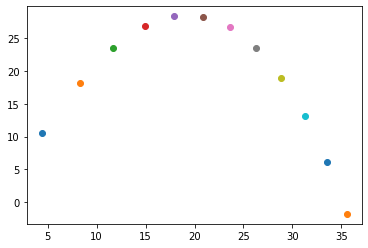